In [12]:
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

In [13]:
def replace_nan(df):
    # get a list of all the columns containing NaN
    nan_cols = df[df.columns[df.isnull().any()]].columns
    nan_cols = nan_cols.drop('bikes')
    # compute and fill each NaN with the columns mean
    df[nan_cols] = df[nan_cols].fillna(value=df[nan_cols].mean())

    
def show_nans(df):
    print(np.unique(df['station']))
    print(df.shape[0] - df.dropna().shape[0])
#     print(df[df.columns[df.isnull().any()]].columns)
    print(df.isnull().any())
    print()
    

# converting weekdays into integers [1-7]
def convert_weekdays(df):
    df = df.replace(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    [1, 2, 3, 4, 5, 6, 7], inplace=True)
    
def score_abs_error(model, data, n_docks, round_ = False):
    if round_ == True:
        y_pred = np.around(  model.predict(data.iloc[:,:-1].to_numpy()) * num_docks  )
    else:
        y_pred = model.predict(data.iloc[:,:-1].to_numpy()) * num_docks
    y_gold = data["bikes"].to_numpy() * num_docks
    
    return mean_absolute_error(y_gold, y_pred)

def reasonable_predictions(model, data):
    y_pred = model.predict(data.to_numpy())
    
    y_pred = np.around(y_pred)
    return y_pred


## This code is added

In [14]:
# Adding all files into one DataFrame
df = []
for path in Path('./Train/Train').rglob('*.csv'):
    tmp = pd.read_csv(path)
    # comment next line if not averaging NaNs  
#     show_nans(tmp)
#     replace_nan(tmp)
#     tmp = tmp.dropna(axis='rows')
    df.append(tmp)

df = pd.concat(df, ignore_index=True)

columns = df.columns

nancount = pd.DataFrame(index = columns)
counts = []

for c in columns:

    counts.append(df[c].shape[0] - df[c].dropna().shape[0])
    
nancount["counts"] = counts
pd.set_option('display.max_rows', 23)
counts

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 75,
 75,
 375,
 75,
 75,
 75,
 75,
 300,
 12825,
 12600,
 12825,
 12600,
 75]

In [15]:
# Adding all files into one DataFrame
df = []
for path in Path('./Train/Train').rglob('*.csv'):
    tmp = pd.read_csv(path)
    # comment next line if not averaging NaNs  
    # show_nans(tmp)
    #replace_nan(tmp)
    tmp = tmp.dropna(axis='rows')
    df.append(tmp)

df = pd.concat(df, ignore_index=True)

convert_weekdays(df)

# # deleting unneeded columns
del df["month"]
del df["year"]
# del df["timestamp"]
# del df["station"]


# comment next line if not dropping NaNs



# scaler = StandardScaler()
# df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

print(df.columns)

Index(['station', 'latitude', 'longitude', 'numDocks', 'timestamp', 'day',
       'hour', 'weekday', 'weekhour', 'isHoliday', 'windMaxSpeed.m.s',
       'windMeanSpeed.m.s', 'windDirection.grades', 'temperature.C',
       'relHumidity.HR', 'airPressure.mb', 'precipitation.l.m2',
       'bikes_3h_ago', 'full_profile_3h_diff_bikes', 'full_profile_bikes',
       'short_profile_3h_diff_bikes', 'short_profile_bikes', 'bikes'],
      dtype='object')


In [5]:
plt.hist(df["isHoliday"])

NameError: name 'plt' is not defined

(array([15077.,  9412.,  7218.,  5759.,  2925.,  1366.,   480.,   210.,
           50.,   103.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

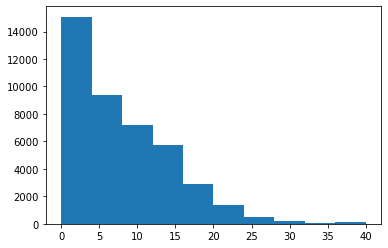

In [16]:
import matplotlib.pyplot as plt

plt.hist(df["bikes"])

In [7]:
# forest = RandomForestRegressor(n_estimators=500, n_jobs=6)
# print("initialised")
# forest.fit(df.iloc[:,:-1].to_numpy(), df["bikes"].to_numpy())

# importances = forest.feature_importances_
# imp_indixes = np.argsort(importances)[::-1]
# feature_order = df.columns[:-1][imp_indixes]
# importances = importances[imp_indixes]

# imp_df = pd.DataFrame(data = importances, index = feature_order, columns=["relative_importance"])

# print(score_abs_error(forest, df))

initialised
0.7897007981220656


In [ ]:
# print(imp_df)
# X = df.iloc[:,:-1].to_numpy()
# Y = df["bikes"].to_numpy()

# from sklearn.decomposition in_estimators=t PCA
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# pca = PCA(n_components = 2, whiten = True)
# X_pca = pca.fit_transform(X)

# print(X_pca.shape)

# fig, ax = plt.subplots(figsize=(12,12))

# ax.scatter(X_pca[:,0], X_pca[:,1], c = Y, edgecolor = '0', alpha=0.5)

# plt.show()

# print(np.corrcoef(X_pca.transpose(), Y))

In [ ]:
# import seaborn as sns

# bins = np.linspace(0, np.max(Y), 8)
# digitized = np.digitize(Y, bins)
# bin_means = [Y[digitized == i].mean() for i in range(1, len(bins))]

# fig, ax = plt.subplots(figsize=(12,12))
# sns.kdeplot(
#     x=X_pca[:,0], y=X_pca[:,1], ax = ax, warn_singular=False, fill = True, hue=digitized
# )#
# # plt.show()

In [ ]:
# plot_features = feature_order[:5].to_list()
# plot_features.append("bikes")
# print(plot_features)

# g = sns.PairGrid(df[plot_features], diag_sharey=False, corner=True)
# g.map_upper(sns.scatterplot)
# g.map_lower(sns.kdeplot)
# g.map_diag(sns.kdeplot)


In [ ]:


# lowest_ranked_10 = feature_order[-5:]
# for feature in lowest_ranked_10:
#     del df[feature]
# print(imp_df)





In [17]:
train, val = train_test_split(df, test_size=0.2)


columns = list(df.columns[-6:])
print(columns)
for c in columns:
    train[c] = train[c].to_numpy() / train["numDocks"].to_numpy()
    val[c] = val[c].to_numpy() / val["numDocks"].to_numpy()


train_docks = train["numDocks"]
val_docks = train["numDocks"]
del train["numDocks"]
del val["numDocks"]

val

# See all Rows/Cols

#pd.set_option('display.max_rows', 23)

['bikes_3h_ago', 'full_profile_3h_diff_bikes', 'full_profile_bikes', 'short_profile_3h_diff_bikes', 'short_profile_bikes', 'bikes']


,station,latitude,longitude,timestamp,day,hour,weekday,weekhour,isHoliday,windMaxSpeed.m.s,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
18410,259,39.465639,-0.396839,1.413587e+09,18,1,6,122,0,3.2,...,20.1,82.0,1019.9,0.0,0.400000,0.033333,0.533333,0.033333,0.533333,0.466667
26744,229,39.471602,-0.338241,1.412910e+09,10,5,5,102,0,6.4,...,20.2,76.0,1010.7,0.0,1.000000,-0.200000,0.750000,-0.200000,0.750000,1.000000
26747,229,39.471602,-0.338241,1.412924e+09,10,9,5,106,0,3.2,...,19.6,70.0,1011.4,0.0,1.000000,-0.900000,0.000000,-0.900000,0.000000,0.650000
22946,246,39.489406,-0.386738,1.413558e+09,17,17,5,114,0,27.4,...,26.9,52.0,1016.9,0.0,0.157895,0.263158,0.289474,0.263158,0.289474,0.473684
33752,226,39.461920,-0.338812,1.413608e+09,18,7,6,128,0,4.8,...,17.6,75.0,1020.1,0.0,0.240000,-0.120000,0.880000,-0.120000,0.880000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,270,39.445428,-0.393106,1.413230e+09,13,22,1,23,0,16.1,...,21.6,44.0,1009.0,0.0,0.750000,0.400000,0.800000,0.400000,0.800000,1.000000
36994,255,39.451660,-0.388669,1.413007e+09,11,8,6,129,0,11.3,...,19.4,72.0,1012.7,0.0,1.000000,-0.150000,0.200000,-0.150000,0.200000,0.850000
14799,222,39.461261,-0.347921,1.412845e+09,9,11,4,84,1,24.1,...,24.4,57.0,1012.0,0.0,0.900000,-0.550000,0.000000,-0.550000,0.000000,0.550000
31425,221,39.463056,-0.354640,1.413410e+09,16,0,4,73,0,27.4,...,22.6,60.0,1013.0,0.0,0.200000,0.100000,0.766667,0.100000,0.766667,0.866667


In [10]:
df

,station,latitude,longitude,numDocks,timestamp,day,hour,weekday,weekhour,isHoliday,...,temperature.C,relHumidity.HR,airPressure.mb,precipitation.l.m2,bikes_3h_ago,full_profile_3h_diff_bikes,full_profile_bikes,short_profile_3h_diff_bikes,short_profile_bikes,bikes
0,206,39.472030,-0.370965,24,1.412730e+09,8,3,3,52,0,...,21.5,59.0,1011.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,206,39.472030,-0.370965,24,1.412734e+09,8,4,3,53,0,...,20.8,62.0,1011.1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,206,39.472030,-0.370965,24,1.412737e+09,8,5,3,54,0,...,19.8,67.0,1010.9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,206,39.472030,-0.370965,24,1.412741e+09,8,6,3,55,0,...,19.7,66.0,1010.8,0.0,0.000000,0.041667,0.041667,0.041667,0.041667,1.0
4,206,39.472030,-0.370965,24,1.412744e+09,8,7,3,56,0,...,19.6,67.0,1011.1,0.0,0.000000,0.083333,0.083333,0.083333,0.083333,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42595,208,39.469056,-0.375728,34,1.414778e+09,31,19,5,116,0,...,20.2,80.0,1023.5,0.0,0.352941,0.007353,0.294118,0.007353,0.294118,6.0
42596,208,39.469056,-0.375728,34,1.414782e+09,31,20,5,117,0,...,20.2,82.0,1023.9,0.0,0.264706,-0.066176,0.191176,-0.066176,0.191176,7.0
42597,208,39.469056,-0.375728,34,1.414786e+09,31,21,5,118,0,...,20.0,83.0,1024.0,0.0,0.176471,-0.051471,0.176471,-0.051471,0.176471,6.0
42598,208,39.469056,-0.375728,34,1.414789e+09,31,22,5,119,0,...,19.3,84.0,1024.4,0.0,0.176471,-0.198529,0.095588,-0.198529,0.095588,5.0


# Random elimination parameter tuning
## Random forest regressor

This cell uses `HalvingRandomSearchCV` to find near-optimal parameters for a random forest regressor. It takes a while to run with these parameters.

In [ ]:
# from time import time
# from sklearn.experimental import enable_halving_search_cv  # noqa
# from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV
# from scipy.stats import randint


# # forest_boost = GradientBoostingRegressor(n_estimators=n_est, loss='squared_error', learning_rate=0.2, max_depth=2, verbose=1)
# #  forest_boost = SVR()
# searched_boost = RandomForestRegressor()
# searched_boost = GradientBoostingRegressor()



# param_distributions = {"max_depth":  [2,3,4],   #, 5, 6, None],
#                        "min_samples_split": np.around(np.linspace(2,20,10)).astype(np.int32),
#                        "learning_rate": np.linspace(0.0001,1,10),
#                        "n_estimators": np.linspace(5, 5000, 50).astype(np.int32)
#                       }

# search = HalvingRandomSearchCV(searched_boost, param_distributions,
#                                resource='n_samples', aggressive_elimination=True, min_resources = 1000,
#                                factor = 2 ,cv = 2,    # n_candidates =  25
#                                random_state=0, verbose=1, n_jobs=6).fit(train.iloc[:,:-1].to_numpy(), train["bikes"].to_numpy())

# print(search.best_params_)

In [ ]:
from time import time
start = time()
print("initialised")
#forest_boost = GradientBoostingRegressor(**search.best_params_)
forest_boost = GradientBoostingRegressor(n_estimators= 5000, min_samples_split= 10, max_depth= 3, learning_rate= 0.2, verbose = 1)
forest_boost.fit(train.iloc[:,:-1].to_numpy(), train["bikes"].to_numpy())
print(f'fitted in {time() - start}s')

initialised
      Iter       Train Loss   Remaining Time 
         1           0.0803            6.30m
         2           0.0660            5.50m
         3           0.0564            5.19m
         4           0.0497            5.02m
         5           0.0450            4.92m
         6           0.0415            4.84m
         7           0.0392            4.81m
         8           0.0374            4.77m
         9           0.0361            4.75m
        10           0.0352            4.73m
        20           0.0318            4.56m
        30           0.0309            4.52m
        40           0.0303            4.48m
        50           0.0299            4.46m
        60           0.0295            4.43m
        70           0.0292            4.42m
        80           0.0289            4.40m
        90           0.0287            4.38m
       100           0.0285            4.37m
       200           0.0266            4.27m
       300           0.0253            4.1

In [ ]:
print(score_abs_error(forest_boost, val, val_docks))
print(score_abs_error(forest_boost, val, val_docks, round_ = True))

In [ ]:


# results = pd.DataFrame(search.cv_results_)
# results["params_str"] = results.params.apply(str)
# params = search.param_distributions
# # results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
# learning_rates = params["learning_rate"]
# mean_scores = results.pivot(
#     index="iter", columns="params_str", values="mean_test_score"
# )

# fig, ax = plt.subplots(figsize=(16,12))
# mean_scores.plot(legend=False, alpha=0.6, ax = ax, linewidth=8)

# labels = [
#     f"iter={i}\nn_samples={search.n_resources_[i]} \nn_candidates={search.n_candidates_[i]}"# \nn_estimators={params["n_estimators"][i]} "
#     for i in range(search.n_iterations_)
# ]

# ax.set_xticks(range(search.n_iterations_))
# ax.set_xticklabels(labels, rotation=45, multialignment="left")
# ax.set_title("Scores of candidates over iterations")
# ax.set_ylabel("mean test score", fontsize=15)
# ax.set_xlabel("iterations", fontsize=15)
# plt.tight_layout()
# plt.show()


In [ ]:
# try:
#     n_est = search.best_params_["n_estimators"]
# except:
n_est = 5000

import matplotlib.pyplot as plt
test_score = np.zeros((n_est,), dtype=np.float64)

y_test = val["bikes"]
#y_pred = reasonable_predictions(forest_boost, val.iloc[:, :-1])

for i, y_pred in enumerate(forest_boost.staged_predict(val.iloc[:,:-1])):
    test_score[i] = forest_boost.loss_(y_test, np.around(y_pred))


fig = plt.figure(figsize=(12, 12))
plt.subplot(1, 1, 1)
plt.title("Training and validation error")
plt.plot(
    np.arange(n_est) + 1,
    forest_boost.train_score_,
    "b-",
    label="Training Set",
)
plt.plot(
    np.arange(n_est) + 1, test_score, "r-", label="Validation Set"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Squared error")
#plt.yscale('log')
fig.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(y_test - forest_boost.predict(val.iloc[:,:-1]), bins = 30)
plt.show()

In [ ]:
test = pd.read_csv('test.csv')

ids = test["Id"]

del test["Id"]
del test["month"]
del test["year"]

convert_weekdays(test)
# test[test.columns] = scaler.fit_transform(test[test.columns])

for feature in lowest_ranked_10:
    del test[feature]
    
print(test.columns)  
print(train.columns)

#y_pred = forest_boost.predict(test)
y_pred = reasonable_predictions(forest_boost, test)

sub_df = pd.DataFrame(data=y_pred, index = ids, columns = ["bikes"])

sub_df.index.name = 'Id'

print(sub_df.head())

sub_df.to_csv("trial.csv")